# TASK 1

## Problem statement:-
### Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

### Sample Dataset :-



### https://data.worldbank.org/indicator/SP.POP.TOTL

# 1.Import Library And Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

In [2]:
df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_394793.csv')

In [3]:
df.head()

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2014         2015         2016         2017  \
0      58782.0  ...     103594.0     104257.0     104874.0     105439.0   
1  149742351.0  ...  583651101.0  600008424.0  616377605.0  632746570.0   
2    9565147.0  ...   32716210.0   33753499.0   34636207.0   35643418.0   
3  108336203.0  ...  397855507.0  408690375.0  419778384.0  431138704.0   
4    5736582.0  ...   27128337.0   28127721.0   29154746.0   30208628.0   

          2018         2019         2020         2021         2022  2023  
0     105962.0     106442.0     106585.0     106537.0     106445.0   NaN  
1  649757148.0  667242986.0  685112979.0  702977106.0  720859132.0   NaN  
2   36686784.0   37769499.0   38972230.0   40099462.0   41128771.0   NaN  
3  442646825.0  454306063.0  466189102.0  478185907.0  490330870.0   NaN  
4   31273533.0   32353588.0   33428486.0   34503774.0   35588987.0   NaN  

[5 rows x 68 columns]

# 2.Data Cleaning 

In [4]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
Length: 68, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

#### The column for the year 2023 contains only null values, as there is no data available. Therefore, this column should be dropped from the dataset.

In [6]:
df = df.drop(['2023'],axis ='columns')

In [7]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [8]:
df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2018              1
2019              1
2020              1
2021              1
2022              1
Length: 67, dtype: int64

#### The dataset contains some null values for each year from 1960 to 2022. To ensure completeness, these null values should be filled with the mean value for each respective year.

In [9]:
for year in range(1960, 2023):
    column = str(year)
    mean_year = round(df[column].mean(), 2)
    df[column] = df[column].fillna(mean_year)

In [10]:
df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2018              0
2019              0
2020              0
2021              0
2022              0
Length: 67, dtype: int64

# 3.Data Analysis And Exploration

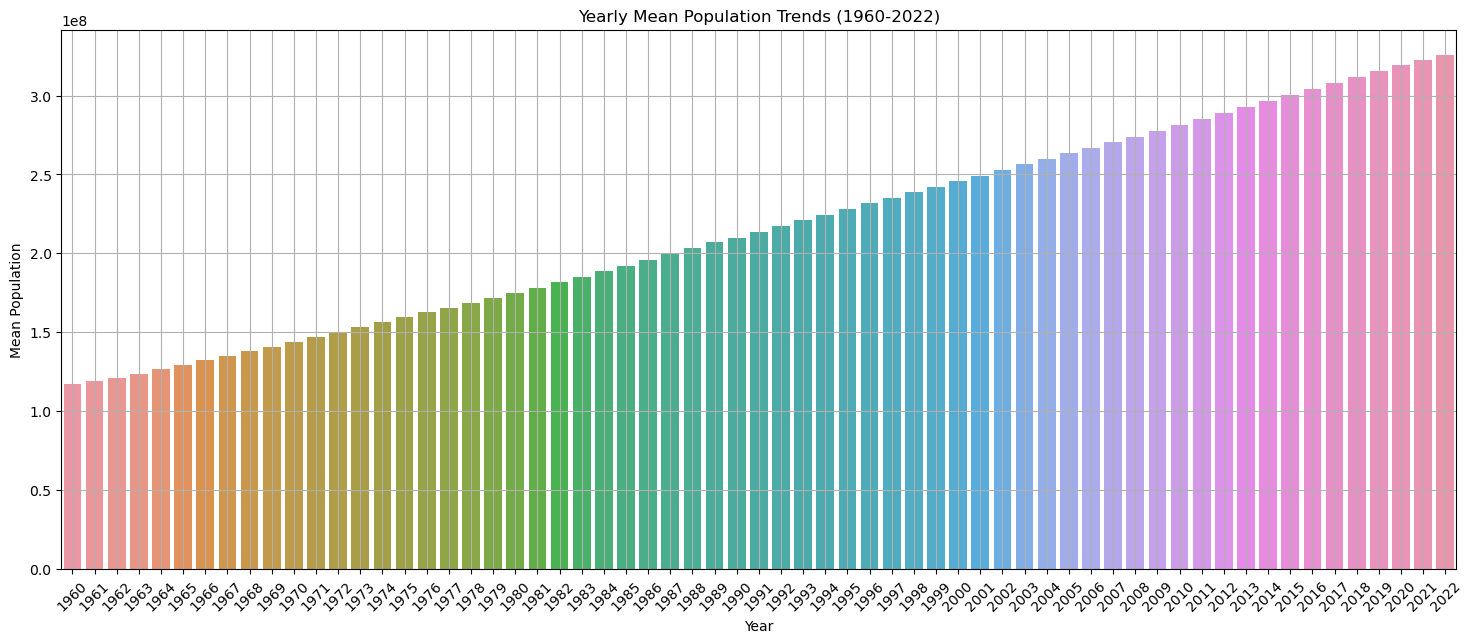

In [11]:
# yearly mean population plot
yearly_means = df.loc[:, '1960':'2022'].mean()
yearly_means_df = yearly_means.reset_index()
yearly_means_df.columns = ['Year', 'Mean Population']
yearly_means_df['Year'] = yearly_means_df['Year'].astype(int)
plt.figure(figsize=(18, 7))
sns.barplot(data=yearly_means_df, x='Year', y='Mean Population')
plt.title('Yearly Mean Population Trends (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Identify the countries with the highest,median and  lowest averages
    

In [12]:
def country_level_analysis(df):

    years = [str(year) for year in range(1960, 2023)]
    df_country_means = df[['Country Name'] + years].copy()

    df_country_means.loc[:, 'Mean Population'] = df_country_means[years].mean(axis=1)

    highest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmax()]

    lowest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmin()]

    median_avg_population = df_country_means['Mean Population'].median()

    df_country_means.loc[:, 'Median Difference'] = abs(df_country_means['Mean Population'] - median_avg_population)

    closest_to_median_country = df_country_means.loc[df_country_means['Median Difference'].idxmin()]

    print("Country with the highest average population:")
    print(highest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry with the lowest average population:")
    print(lowest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry with the median average population:")
    print(closest_to_median_country[['Country Name', 'Mean Population']])


country_level_analysis(df)


Country with the highest average population:
Country Name                   World
Mean Population    5407575828.666667
Name: 259, dtype: object

Country with the lowest average population:
Country Name       Tuvalu
Mean Population    8564.0
Name: 245, dtype: object

Country with the median average population:
Country Name              Bolivia
Mean Population    7490944.761905
Name: 28, dtype: object


# continent Analysis

In [13]:
region_mapping = {
    # Africa
    'Africa Eastern and Southern': 'Africa',
    'Africa Western and Central': 'Africa',
    'Angola': 'Africa',
    'Burundi': 'Africa',
    'Benin': 'Africa',
    'Burkina Faso': 'Africa',
    'Botswana': 'Africa',
    'Central African Republic': 'Africa',
    'Cote d\'Ivoire': 'Africa',
    'Cameroon': 'Africa',
    'Congo, Dem. Rep.': 'Africa',
    'Congo, Rep.': 'Africa',
    'Comoros': 'Africa',
    'Cabo Verde': 'Africa',
    'Djibouti': 'Africa',
    'Algeria': 'Africa',
    'Egypt, Arab Rep.': 'Africa',
    'Eritrea': 'Africa',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Gabon': 'Africa',
    'Ghana': 'Africa',
    'Guinea': 'Africa',
    'Gambia, The': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Equatorial Guinea': 'Africa',
    'Kenya': 'Africa',
    'Liberia': 'Africa',
    'Lesotho': 'Africa',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Mali': 'Africa',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Rwanda': 'Africa',
    'Seychelles': 'Africa',
    'Sudan': 'Africa',
    'Sierra Leone': 'Africa',
    'Senegal': 'Africa',
    'Somalia': 'Africa',
    'South Sudan': 'Africa',
    'Sao Tome and Principe': 'Africa',
    'Eswatini': 'Africa',
    'Chad': 'Africa',
    'Togo': 'Africa',
    'Tanzania': 'Africa',
    'Uganda': 'Africa',
    'South Africa': 'Africa',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa',
    # Asia
    'Afghanistan': 'Asia',
    'China': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'Indonesia': 'Asia',
    'Bangladesh': 'Asia',
    'Brunei Darussalam': 'Asia',
    'Bhutan': 'Asia',
    'Cambodia': 'Asia',
    'Kazakhstan': 'Asia',
    'Kyrgyz Republic': 'Asia',
    'Laos': 'Asia',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mongolia': 'Asia',
    'Myanmar': 'Asia',
    'Nepal': 'Asia',
    'Pakistan': 'Asia',
    'Philippines': 'Asia',
    'Singapore': 'Asia',
    'Sri Lanka': 'Asia',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Turkmenistan': 'Asia',
    'Uzbekistan': 'Asia',
    'Vietnam': 'Asia',
    # Europe
    'Albania': 'Europe',
    'Andorra': 'Europe',
    'Austria': 'Europe',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Bulgaria': 'Europe',
    'Croatia': 'Europe',
    'Cyprus': 'Europe',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Estonia': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Kosovo': 'Europe',
    'Latvia': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Moldova': 'Europe',
    'Monaco': 'Europe',
    'Montenegro': 'Europe',
    'Netherlands': 'Europe',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'San Marino': 'Europe',
    'Serbia': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    # North America
    'Canada': 'North America',
    'United States': 'North America',
    'Mexico': 'North America',
    'Guatemala': 'North America',
    'Cuba': 'North America',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Jamaica': 'North America',
    'Nicaragua': 'North America',
    'Panama': 'North America',
    'Puerto Rico': 'North America',
    'Trinidad and Tobago': 'North America',
    # South America
    'Argentina': 'South America',
    'Bolivia': 'South America',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Ecuador': 'South America',
    'Guyana': 'South America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Suriname': 'South America',
    'Uruguay': 'South America',
    'Venezuela': 'South America',
    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'Fiji': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Samoa': 'Oceania',
    'Solomon Islands': 'Oceania',
    'Vanuatu': 'Oceania',
    # Middle East
    'Bahrain': 'Middle East',
    'Iran, Islamic Rep.': 'Middle East',
    'Iraq': 'Middle East',
    'Israel': 'Middle East',
    'Jordan': 'Middle East',
    'Kuwait': 'Middle East',
    'Lebanon': 'Middle East',
    'Oman': 'Middle East',
    'Qatar': 'Middle East',
    'Saudi Arabia': 'Middle East',
    'Syrian Arab Republic': 'Middle East',
    'Turkey': 'Middle East',
    'United Arab Emirates': 'Middle East',
    'Yemen, Rep.': 'Middle East',
}


# Africa

### Identify the countries with the highest,median and  lowest averages In Africa

In [14]:
def country_level_analysis(df, region_mapping):

    years = [str(year) for year in range(1960, 2023)]

    df['Region'] = df['Country Name'].map(region_mapping)

    df_africa = df[df['Region'] == 'Africa']
    
    df_country_means = df_africa[['Country Name'] + years].copy()

    df_country_means.loc[:, 'Mean Population'] = df_country_means[years].mean(axis=1)

    highest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmax()]

    lowest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmin()]

    median_avg_population = df_country_means['Mean Population'].median()

    df_country_means.loc[:, 'Median Difference'] = abs(df_country_means['Mean Population'] - median_avg_population)

    closest_to_median_country = df_country_means.loc[df_country_means['Median Difference'].idxmin()]

    print("Country with the highest average population in Africa:")
    print(highest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry with the lowest average population in Africa:")
    print(lowest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry in Africa closest to the median average population:")
    print(closest_to_median_country[['Country Name', 'Mean Population']])

country_level_analysis(df, region_mapping)

Country with the highest average population in Africa:
Country Name       Africa Eastern and Southern
Mean Population                351920114.52381
Name: 1, dtype: object

Country with the lowest average population in Africa:
Country Name         Seychelles
Mean Population    72057.984127
Name: 226, dtype: object

Country in Africa closest to the median average population:
Country Name                 Chad
Mean Population    7630713.793651
Name: 229, dtype: object


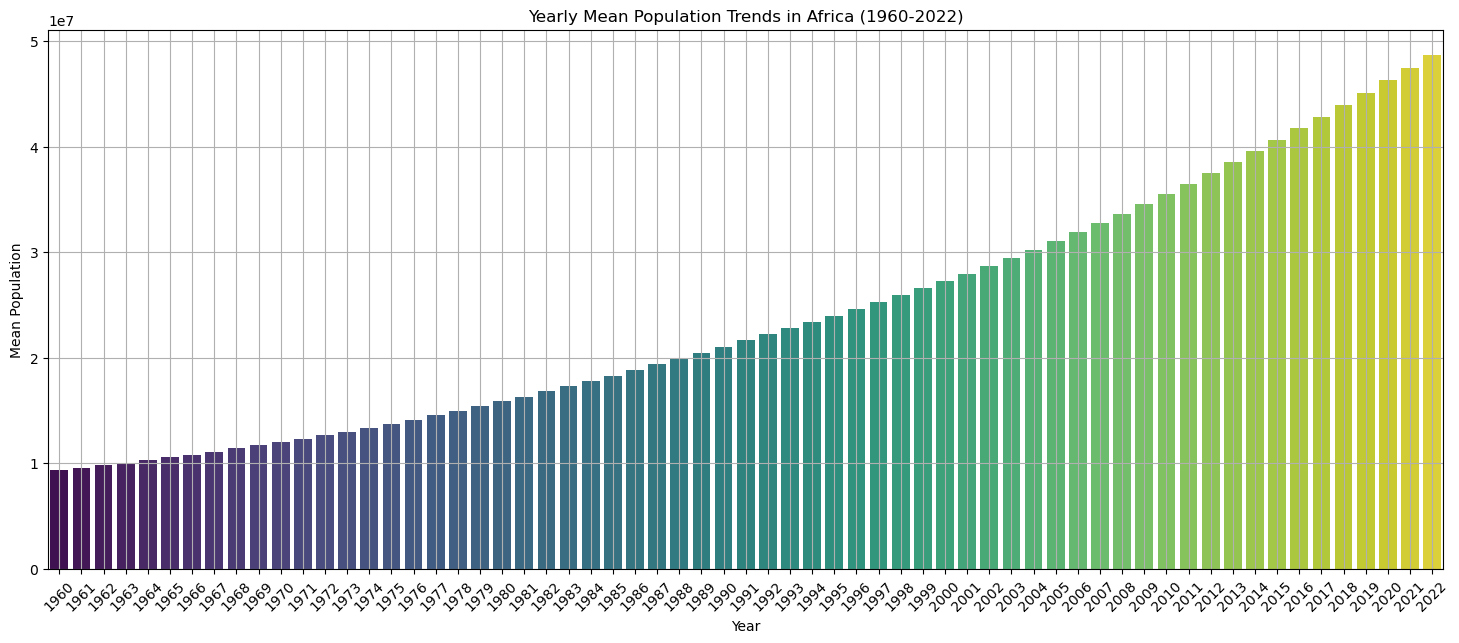

In [15]:
# yearly mean population in africa plot
df['Region'] = df['Country Name'].map(region_mapping)

df_africa = df[df['Region'] == 'Africa']

years = [str(year) for year in range(1960, 2023)]
yearly_means = df_africa[years].mean()
yearly_means_df = yearly_means.reset_index()
yearly_means_df.columns = ['Year', 'Mean Population']
yearly_means_df['Year'] = yearly_means_df['Year'].astype(int)

plt.figure(figsize=(18, 7))
sns.barplot(data=yearly_means_df, x='Year', y='Mean Population', palette='viridis')
plt.title('Yearly Mean Population Trends in Africa (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
df['Region'] = df['Country Name'].map(region_mapping)
df_africa = df[df['Region'] == 'Africa']

year = '2022'
df_choropleth = df_africa[['Country Name', 'Country Code', year]].dropna()
df_choropleth.columns = ['Country', 'ISO3', 'Population']

fig = px.choropleth(df_choropleth, 
                    locations='ISO3',
                    color='Population',
                    hover_name='Country',
                    color_continuous_scale='Viridis',
                    title=f'Choropleth Map of Population in Africa in {year}')

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    title={
        'text': f'Choropleth Map of Population in Africa in {year}',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

# Asia

### Identify the countries with the highest,median and  lowest averages in Asia

In [17]:
def country_level_analysis(df, region_mapping):

    years = [str(year) for year in range(1960, 2023)]
    
    df['Region'] = df['Country Name'].map(region_mapping)

    df_asia = df[df['Region'] == 'Asia']
    
    df_country_means = df_asia[['Country Name'] + years].copy()

    df_country_means.loc[:, 'Mean Population'] = df_country_means[years].mean(axis=1)

    highest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmax()]

    lowest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmin()]

    median_avg_population = df_country_means['Mean Population'].median()

    df_country_means.loc[:, 'Median Difference'] = abs(df_country_means['Mean Population'] - median_avg_population)

    closest_to_median_country = df_country_means.loc[df_country_means['Median Difference'].idxmin()]

    print("Country with the highest average population in Asia:")
    print(highest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry with the lowest average population in Asia:")
    print(lowest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry in Asia closest to the median average population:")
    print(closest_to_median_country[['Country Name', 'Mean Population']])

country_level_analysis(df, region_mapping)


Country with the highest average population in Asia:
Country Name                   China
Mean Population    1104338253.968254
Name: 40, dtype: object

Country with the lowest average population in Asia:
Country Name            Maldives
Mean Population    251421.349206
Name: 152, dtype: object

Country in Asia closest to the median average population:
Country Name           Afghanistan
Mean Population    18410104.444444
Name: 2, dtype: object


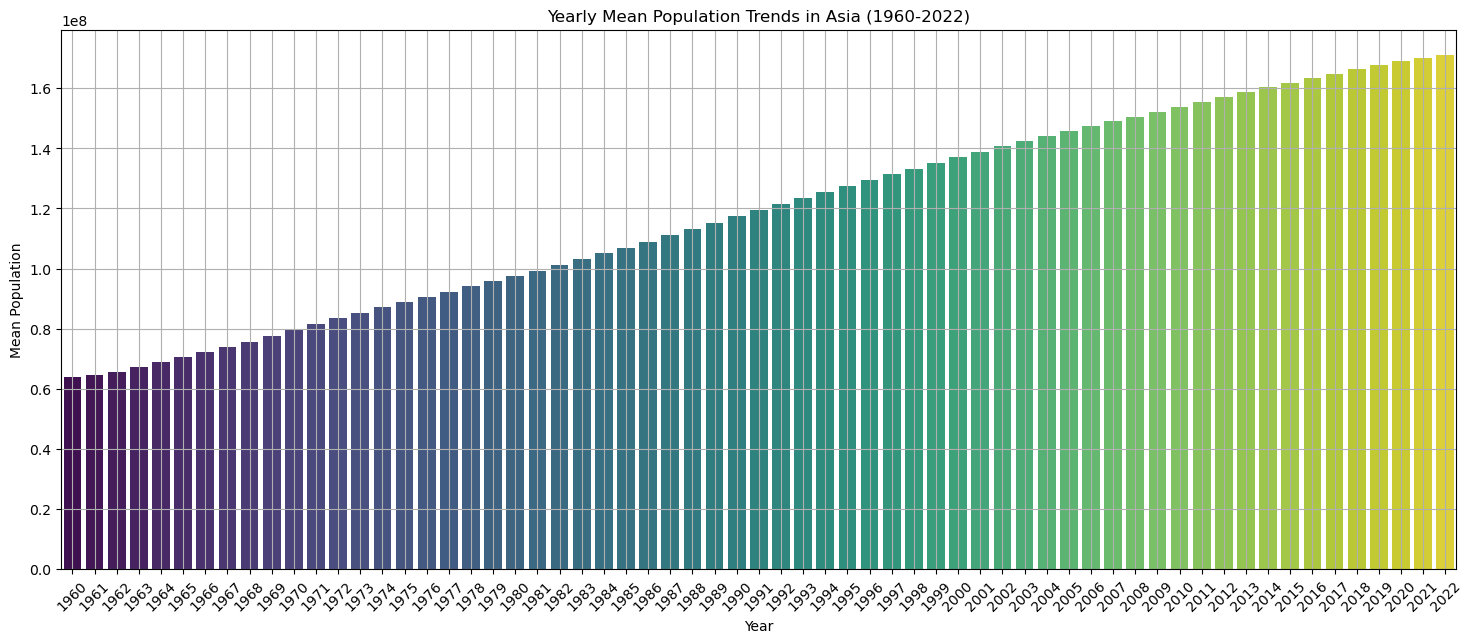

In [18]:
# Yearly Mean Population plot in Asia
df['Region'] = df['Country Name'].map(region_mapping)

df_asia = df[df['Region'] == 'Asia']

years = [str(year) for year in range(1960, 2023)]
yearly_means = df_asia[years].mean()
yearly_means_df = yearly_means.reset_index()
yearly_means_df.columns = ['Year', 'Mean Population']
yearly_means_df['Year'] = yearly_means_df['Year'].astype(int)

plt.figure(figsize=(18, 7))
sns.barplot(data=yearly_means_df, x='Year', y='Mean Population', palette='viridis')
plt.title('Yearly Mean Population Trends in Asia (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [19]:
# Choropleth Map of Population in Asia
df['Region'] = df['Country Name'].map(region_mapping)
df_asia = df[df['Region'] == 'Asia']

year = '2022'
df_choropleth = df_asia[['Country Name', 'Country Code', year]].dropna()
df_choropleth.columns = ['Country', 'ISO3', 'Population']

fig = px.choropleth(df_choropleth, 
                    locations='ISO3',
                    color='Population',
                    hover_name='Country',
                    color_continuous_scale='Viridis',
                    title=f'Choropleth Map of Population in Asia in {year}')

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    title={
        'text': f'Choropleth Map of Population in Asia in {year}',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

# Europe

### Identify the countries with the highest,median and  lowest averages in Europe

In [20]:
def country_level_analysis(df, region_mapping):

    years = [str(year) for year in range(1960, 2023)]

    df['Region'] = df['Country Name'].map(region_mapping)

    df_europe = df[df['Region'] == 'Europe']
    
    df_country_means = df_europe[['Country Name'] + years].copy()

    df_country_means.loc[:, 'Mean Population'] = df_country_means[years].mean(axis=1)

    highest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmax()]

    lowest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmin()]

    median_avg_population = df_country_means['Mean Population'].median()

    df_country_means.loc[:, 'Median Difference'] = abs(df_country_means['Mean Population'] - median_avg_population)

    closest_to_median_country = df_country_means.loc[df_country_means['Median Difference'].idxmin()]

    print("Country with the highest average population in Europe:")
    print(highest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry with the lowest average population in Europe:")
    print(lowest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry in Europe closest to the median average population:")
    print(closest_to_median_country[['Country Name', 'Mean Population']])

country_level_analysis(df, region_mapping)

Country with the highest average population in Europe:
Country Name               Germany
Mean Population    79733485.714286
Name: 55, dtype: object

Country with the lowest average population in Europe:
Country Name         San Marino
Mean Population    24783.984127
Name: 212, dtype: object

Country in Europe closest to the median average population:
Country Name              Finland
Mean Population    5011591.253968
Name: 75, dtype: object


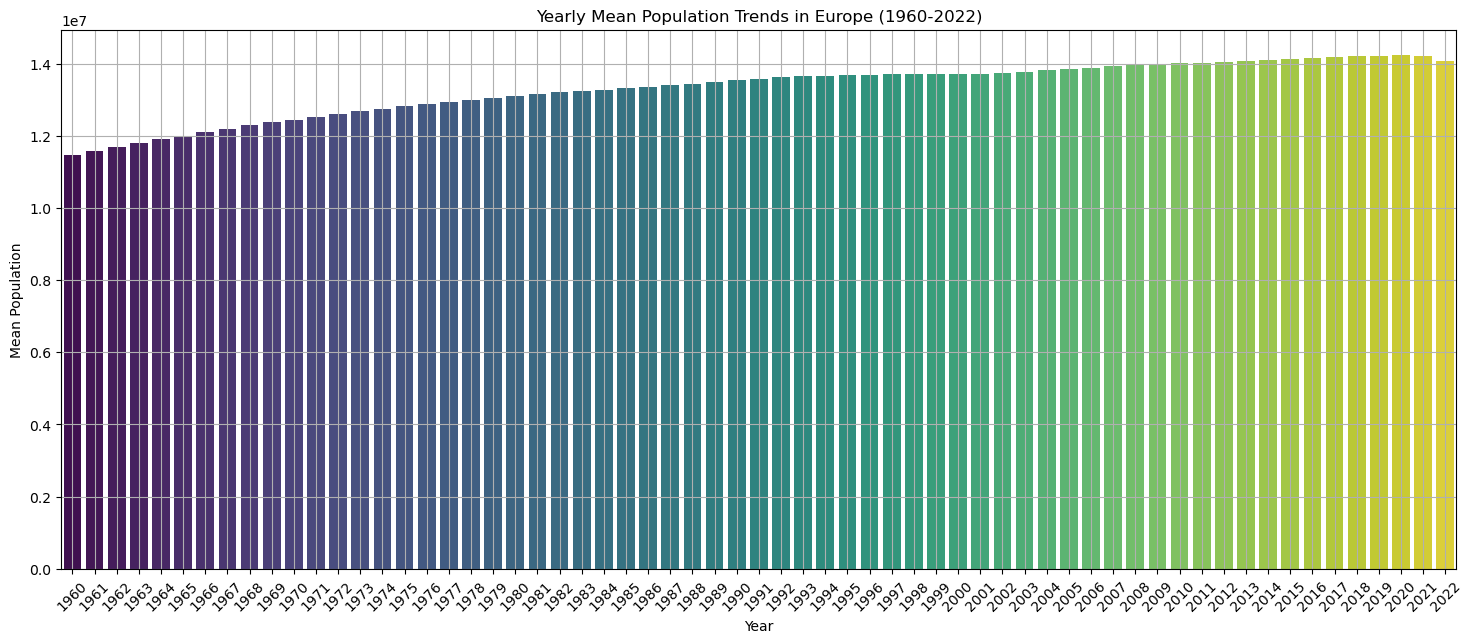

In [21]:
# Yearly Mean Population Plot in Europe
df['Region'] = df['Country Name'].map(region_mapping)

df_europe = df[df['Region'] == 'Europe']

years = [str(year) for year in range(1960, 2023)]
yearly_means = df_europe[years].mean()
yearly_means_df = yearly_means.reset_index()
yearly_means_df.columns = ['Year', 'Mean Population']
yearly_means_df['Year'] = yearly_means_df['Year'].astype(int)

plt.figure(figsize=(18, 7))
sns.barplot(data=yearly_means_df, x='Year', y='Mean Population', palette='viridis')
plt.title('Yearly Mean Population Trends in Europe (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [22]:
# Choropleth Map of Population in Europe
df['Region'] = df['Country Name'].map(region_mapping)
df_europe = df[df['Region'] == 'Europe']

year = '2022'
df_choropleth = df_europe[['Country Name', 'Country Code', year]].dropna()
df_choropleth.columns = ['Country', 'ISO3', 'Population']

fig = px.choropleth(df_choropleth, 
                    locations='ISO3',
                    color='Population',
                    hover_name='Country',
                    color_continuous_scale='Viridis',
                    title=f'Choropleth Map of Population in Europe in {year}')

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    title={
        'text': f'Choropleth Map of Population in Europe in {year}',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

# North America

### Identify the countries with the highest,median and  lowest averages in North America

In [23]:
def country_level_analysis(df, region_mapping):

    years = [str(year) for year in range(1960, 2023)]

    df['Region'] = df['Country Name'].map(region_mapping)

    df_north_america = df[df['Region'] == 'North America']
    
    df_country_means = df_north_america[['Country Name'] + years].copy()

    df_country_means.loc[:, 'Mean Population'] = df_country_means[years].mean(axis=1)

    highest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmax()]

    lowest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmin()]

    median_avg_population = df_country_means['Mean Population'].median()

    df_country_means.loc[:, 'Median Difference'] = abs(df_country_means['Mean Population'] - median_avg_population)

    closest_to_median_country = df_country_means.loc[df_country_means['Median Difference'].idxmin()]

    print("Country with the highest average population in North America:")
    print(highest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry with the lowest average population in North America:")
    print(lowest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry in North America closest to the median average population:")
    print(closest_to_median_country[['Country Name', 'Mean Population']])

country_level_analysis(df, region_mapping)

Country with the highest average population in North America:
Country Name          United States
Mean Population    257525384.396825
Name: 251, dtype: object

Country with the lowest average population in North America:
Country Name           Dominica
Mean Population    69090.031746
Name: 57, dtype: object

Country in North America closest to the median average population:
Country Name             Honduras
Mean Population    5622409.650794
Name: 97, dtype: object


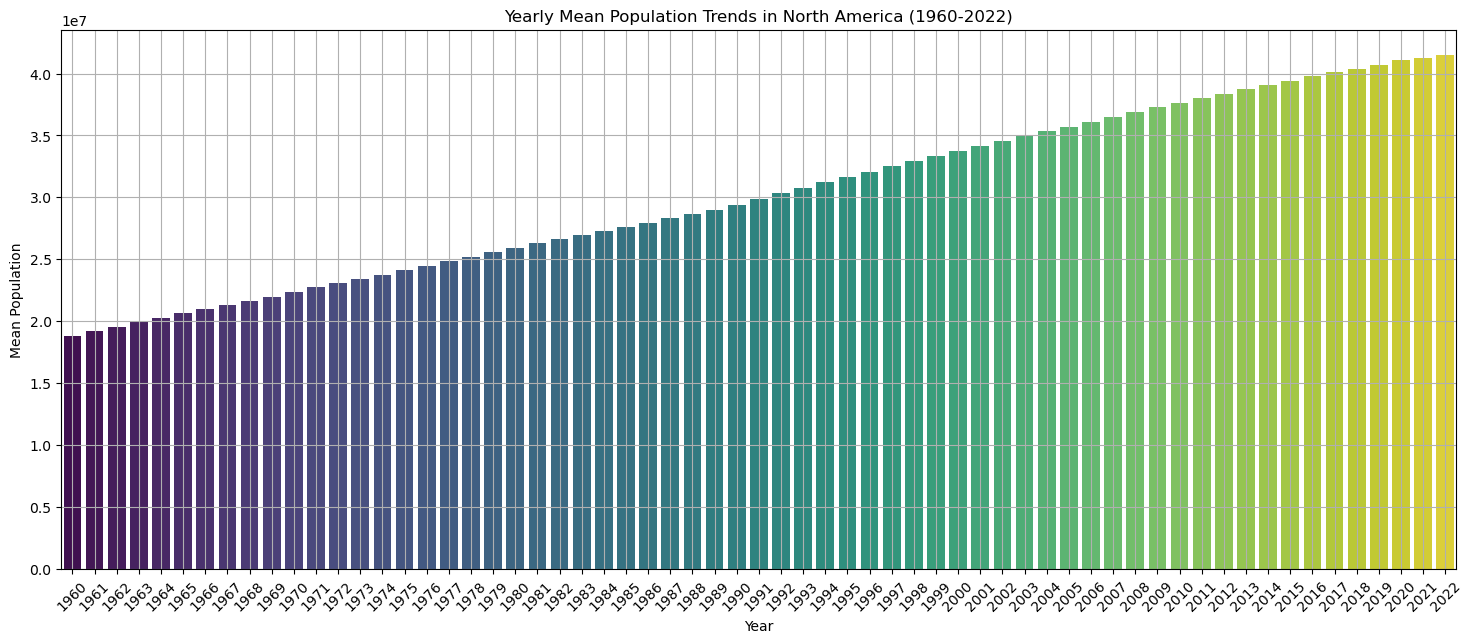

In [24]:
# Yearly Mean Population Plot in North America
df['Region'] = df['Country Name'].map(region_mapping)

df_north_america = df[df['Region'] == 'North America']

years = [str(year) for year in range(1960, 2023)]
yearly_means = df_north_america[years].mean()
yearly_means_df = yearly_means.reset_index()
yearly_means_df.columns = ['Year', 'Mean Population']
yearly_means_df['Year'] = yearly_means_df['Year'].astype(int)

plt.figure(figsize=(18, 7))
sns.barplot(data=yearly_means_df, x='Year', y='Mean Population', palette='viridis')
plt.title('Yearly Mean Population Trends in North America (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [25]:
# Choropleth Map of Population in North America
df['Region'] = df['Country Name'].map(region_mapping)
df_north_america = df[df['Region'] == 'North America']

year = '2022'
df_choropleth = df_north_america[['Country Name', 'Country Code', year]].dropna()
df_choropleth.columns = ['Country', 'ISO3', 'Population']

fig = px.choropleth(df_choropleth, 
                    locations='ISO3',
                    color='Population',
                    hover_name='Country',
                    color_continuous_scale='Viridis',
                    title=f'Choropleth Map of Population in North America in {year}')

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    title={
        'text': f'Choropleth Map of Population in North America in {year}',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

# South America

### Identify the countries with the highest,median and  lowest averages in South America

In [26]:
def country_level_analysis(df, region_mapping):

    years = [str(year) for year in range(1960, 2023)]

    df['Region'] = df['Country Name'].map(region_mapping)

    df_south_america = df[df['Region'] == 'South America']
    
    df_country_means = df_south_america[['Country Name'] + years].copy()

    df_country_means.loc[:, 'Mean Population'] = df_country_means[years].mean(axis=1)

    highest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmax()]

    lowest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmin()]

    median_avg_population = df_country_means['Mean Population'].median()

    df_country_means.loc[:, 'Median Difference'] = abs(df_country_means['Mean Population'] - median_avg_population)

    closest_to_median_country = df_country_means.loc[df_country_means['Median Difference'].idxmin()]

    print("Country with the highest average population in South America:")
    print(highest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry with the lowest average population in South America:")
    print(lowest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry in South America closest to the median average population:")
    print(closest_to_median_country[['Country Name', 'Mean Population']])

country_level_analysis(df, region_mapping)

Country with the highest average population in South America:
Country Name                 Brazil
Mean Population    149619915.746032
Name: 29, dtype: object

Country with the lowest average population in South America:
Country Name            Suriname
Mean Population    443997.095238
Name: 220, dtype: object

Country in South America closest to the median average population:
Country Name               Ecuador
Mean Population    10796087.761905
Name: 66, dtype: object


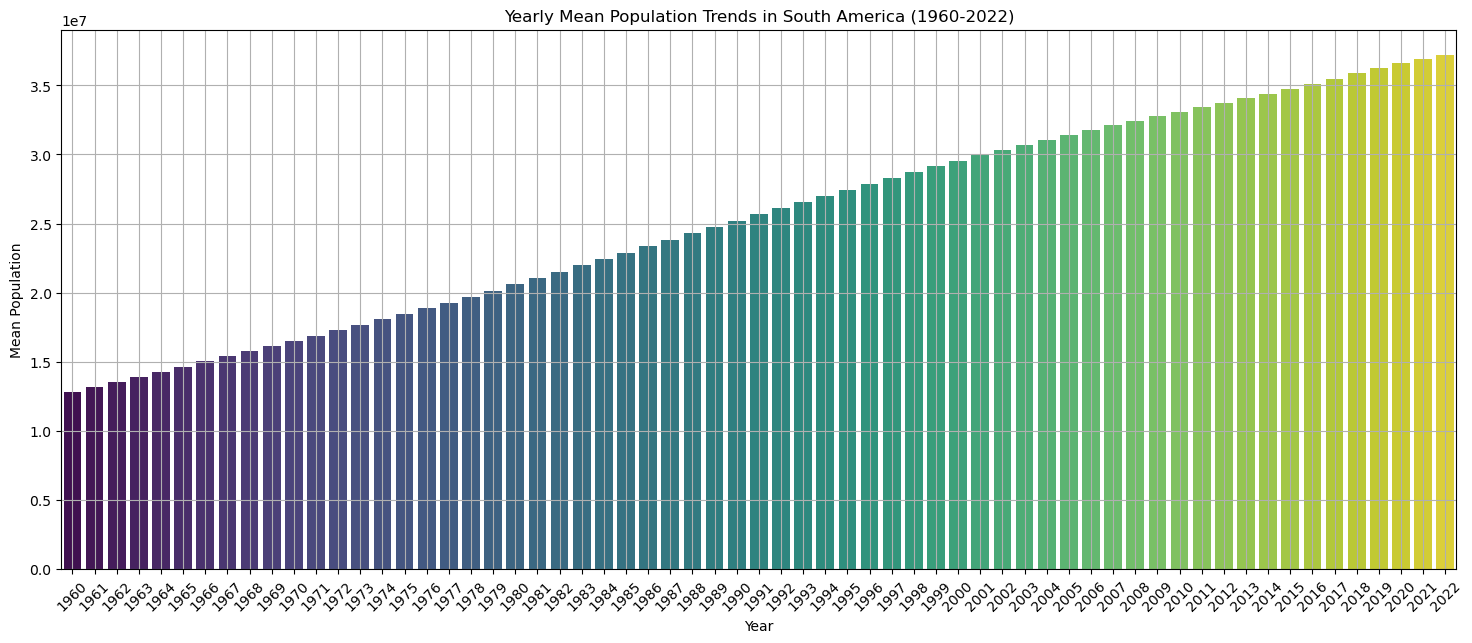

In [27]:
# Yearly Mean Population Plot in South America
df['Region'] = df['Country Name'].map(region_mapping)

df_south_america = df[df['Region'] == 'South America']

years = [str(year) for year in range(1960, 2023)]
yearly_means = df_south_america[years].mean()
yearly_means_df = yearly_means.reset_index()
yearly_means_df.columns = ['Year', 'Mean Population']
yearly_means_df['Year'] = yearly_means_df['Year'].astype(int)

plt.figure(figsize=(18, 7))
sns.barplot(data=yearly_means_df, x='Year', y='Mean Population', palette='viridis')
plt.title('Yearly Mean Population Trends in South America (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [28]:
#Choropleth Map of Population in South America
df['Region'] = df['Country Name'].map(region_mapping)
df_south_america = df[df['Region'] == 'South America']

year = '2022'
df_choropleth = df_south_america[['Country Name', 'Country Code', year]].dropna()
df_choropleth.columns = ['Country', 'ISO3', 'Population']

fig = px.choropleth(df_choropleth, 
                    locations='ISO3',
                    color='Population',
                    hover_name='Country',
                    color_continuous_scale='Viridis',
                    title=f'Choropleth Map of Population in South America in {year}')

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    title={
        'text': f'Choropleth Map of Population in South America in {year}',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

# Oceania

### Identify the countries with the highest,median and  lowest averages in Oceania

In [29]:
def country_level_analysis(df, region_mapping):

    years = [str(year) for year in range(1960, 2023)]

    df['Region'] = df['Country Name'].map(region_mapping)

    df_oceania = df[df['Region'] == 'Oceania']
    
    df_country_means = df_oceania[['Country Name'] + years].copy()

    df_country_means.loc[:, 'Mean Population'] = df_country_means[years].mean(axis=1)

    highest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmax()]

    lowest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmin()]

    median_avg_population = df_country_means['Mean Population'].median()

    df_country_means.loc[:, 'Median Difference'] = abs(df_country_means['Mean Population'] - median_avg_population)

    closest_to_median_country = df_country_means.loc[df_country_means['Median Difference'].idxmin()]

    print("Country with the highest average population in Oceania:")
    print(highest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry with the lowest average population in Oceania:")
    print(lowest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry in Oceania closest to the median average population:")
    print(closest_to_median_country[['Country Name', 'Mean Population']])

country_level_analysis(df, region_mapping)

Country with the highest average population in Oceania:
Country Name             Australia
Mean Population    17488378.666667
Name: 13, dtype: object

Country with the lowest average population in Oceania:
Country Name             Vanuatu
Mean Population    168330.507937
Name: 258, dtype: object

Country in Oceania closest to the median average population:
Country Name                Fiji
Mean Population    731395.968254
Name: 76, dtype: object


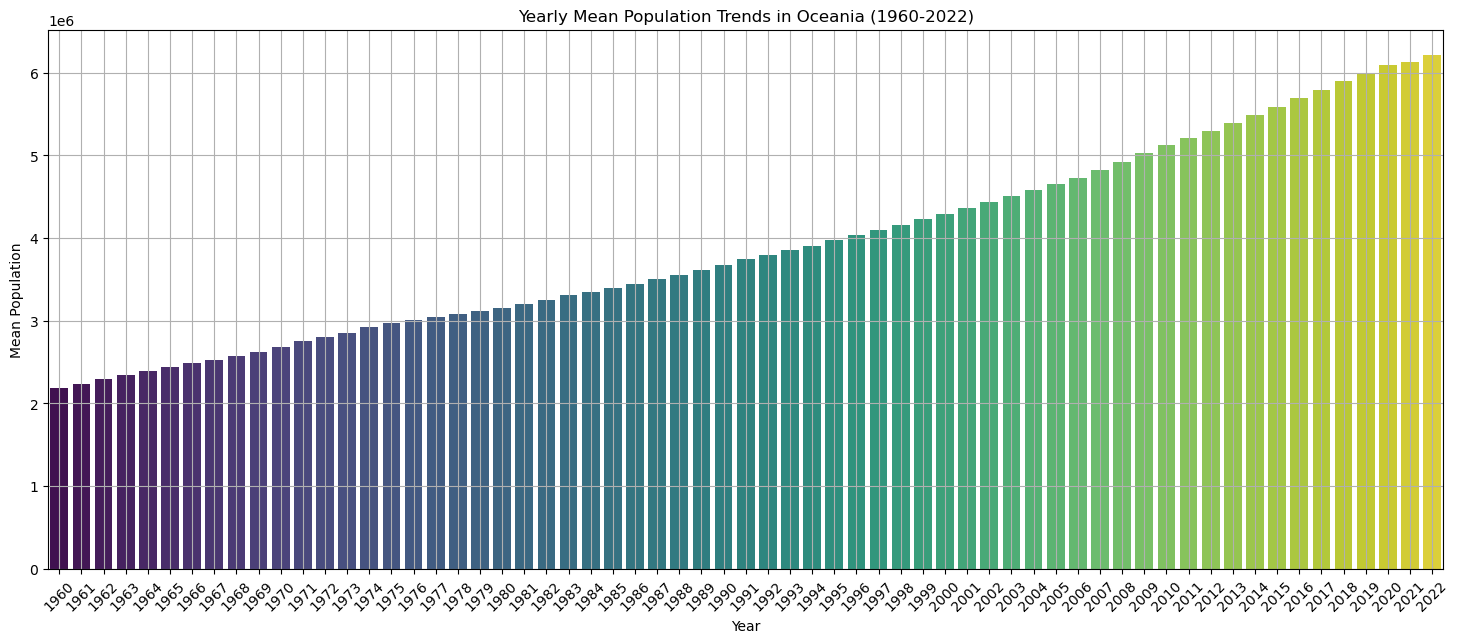

In [30]:
# Yearly Mean Population Plot in Oceania
df['Region'] = df['Country Name'].map(region_mapping)

df_oceania = df[df['Region'] == 'Oceania']

years = [str(year) for year in range(1960, 2023)]
yearly_means = df_oceania[years].mean()
yearly_means_df = yearly_means.reset_index()
yearly_means_df.columns = ['Year', 'Mean Population']
yearly_means_df['Year'] = yearly_means_df['Year'].astype(int)

plt.figure(figsize=(18, 7))
sns.barplot(data=yearly_means_df, x='Year', y='Mean Population', palette='viridis')
plt.title('Yearly Mean Population Trends in Oceania (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [31]:
# Choropleth Map of Population in Oceania
df['Region'] = df['Country Name'].map(region_mapping)
df_oceania = df[df['Region'] == 'Oceania']

year = '2022'
df_choropleth = df_oceania[['Country Name', 'Country Code', year]].dropna()
df_choropleth.columns = ['Country', 'ISO3', 'Population']

fig = px.choropleth(df_choropleth, 
                    locations='ISO3',
                    color='Population',
                    hover_name='Country',
                    color_continuous_scale='Viridis',
                    title=f'Choropleth Map of Population in Oceania in {year}')

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    title={
        'text': f'Choropleth Map of Population in Oceania in {year}',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

# Middle East

### Identify the countries with the highest,median and  lowest averages in Middle East

In [32]:
def country_level_analysis(df, region_mapping):

    df['Region'] = df['Country Name'].map(region_mapping)

    df_middle_east = df[df['Region'] == 'Middle East']
    
    df_country_means = df_middle_east[['Country Name'] + years].copy()

    df_country_means.loc[:, 'Mean Population'] = df_country_means[years].mean(axis=1)

    highest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmax()]

    lowest_avg_country = df_country_means.loc[df_country_means['Mean Population'].idxmin()]

    median_avg_population = df_country_means['Mean Population'].median()

    df_country_means.loc[:, 'Median Difference'] = abs(df_country_means['Mean Population'] - median_avg_population)

    closest_to_median_country = df_country_means.loc[df_country_means['Median Difference'].idxmin()]

    print("Country with the highest average population in Middle East:")
    print(highest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry with the lowest average population in Middle East:")
    print(lowest_avg_country[['Country Name', 'Mean Population']])
    print("\nCountry in Middle East closest to the median average population:")
    print(closest_to_median_country[['Country Name', 'Mean Population']])

country_level_analysis(df, region_mapping)

Country with the highest average population in Middle East:
Country Name       Iran, Islamic Rep.
Mean Population       54122521.047619
Name: 112, dtype: object

Country with the lowest average population in Middle East:
Country Name             Bahrain
Mean Population    664645.587302
Name: 22, dtype: object

Country in Middle East closest to the median average population:
Country Name               Jordan
Mean Population    4438153.095238
Name: 118, dtype: object


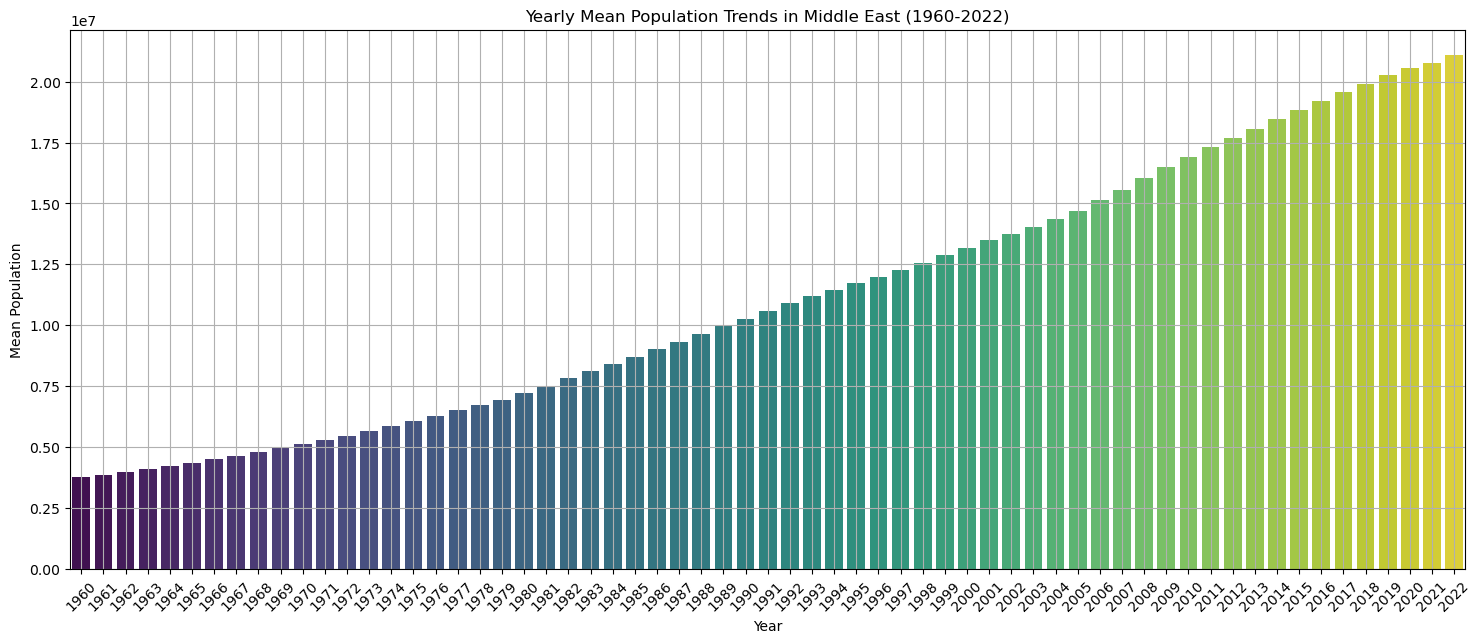

In [33]:
# Yearly Mean Population Plot in Middle East
df['Region'] = df['Country Name'].map(region_mapping)

df_middle_east = df[df['Region'] == 'Middle East']

years = [str(year) for year in range(1960, 2023)]
yearly_means = df_middle_east[years].mean()
yearly_means_df = yearly_means.reset_index()
yearly_means_df.columns = ['Year', 'Mean Population']
yearly_means_df['Year'] = yearly_means_df['Year'].astype(int)

plt.figure(figsize=(18, 7))
sns.barplot(data=yearly_means_df, x='Year', y='Mean Population', palette='viridis')
plt.title('Yearly Mean Population Trends in Middle East (1960-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [34]:
# Choropleth Map of Population in Middle East
df['Region'] = df['Country Name'].map(region_mapping)
df_Middle_East = df[df['Region'] == 'Middle East']

year = '2022'
df_choropleth = df_Middle_East[['Country Name', 'Country Code', year]].dropna()
df_choropleth.columns = ['Country', 'ISO3', 'Population']

fig = px.choropleth(df_choropleth, 
                    locations='ISO3',
                    color='Population',
                    hover_name='Country',
                    color_continuous_scale='Viridis',
                    title=f'Choropleth Map of Population in Middle East in {year}')

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    title={
        'text': f'Choropleth Map of Population in Middle East in {year}',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

<Figure size 1400x700 with 0 Axes>

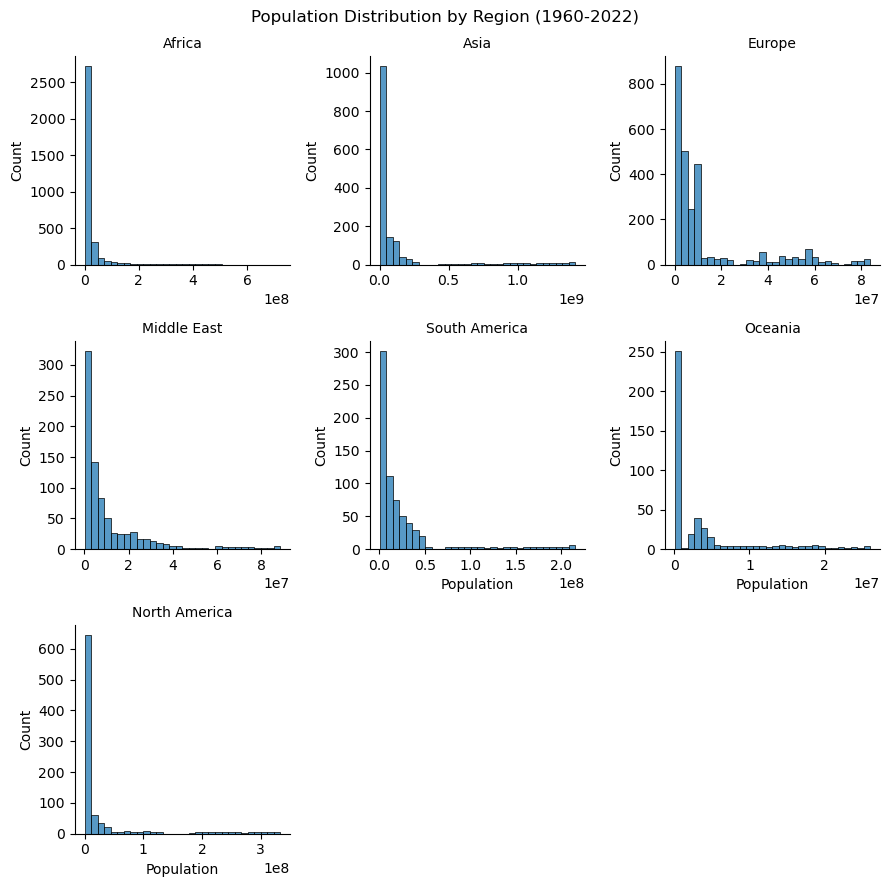

In [35]:
#Population Distribution by Region
def plot_region_population_histogram(df, region_mapping):
    df['Region'] = df['Country Name'].map(region_mapping)

    df_melted = df.melt(id_vars=['Country Name', 'Region'], 
                        value_vars=[str(year) for year in range(1960, 2023)], 
                        var_name='Year', value_name='Population')

    df_melted = df_melted.dropna(subset=['Population'])

    region_palette = sns.color_palette('Set2', n_colors=len(df['Region'].unique()))

    plt.figure(figsize=(14, 7))

    g = sns.FacetGrid(df_melted, col="Region", col_wrap=3, sharex=False, sharey=False, palette=region_palette)
    g.map(sns.histplot, "Population", bins=30, kde=False)

    g.set_titles("{col_name}")
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Population Distribution by Region (1960-2022)')
    
    plt.tight_layout()
    plt.show()

plot_region_population_histogram(df, region_mapping)



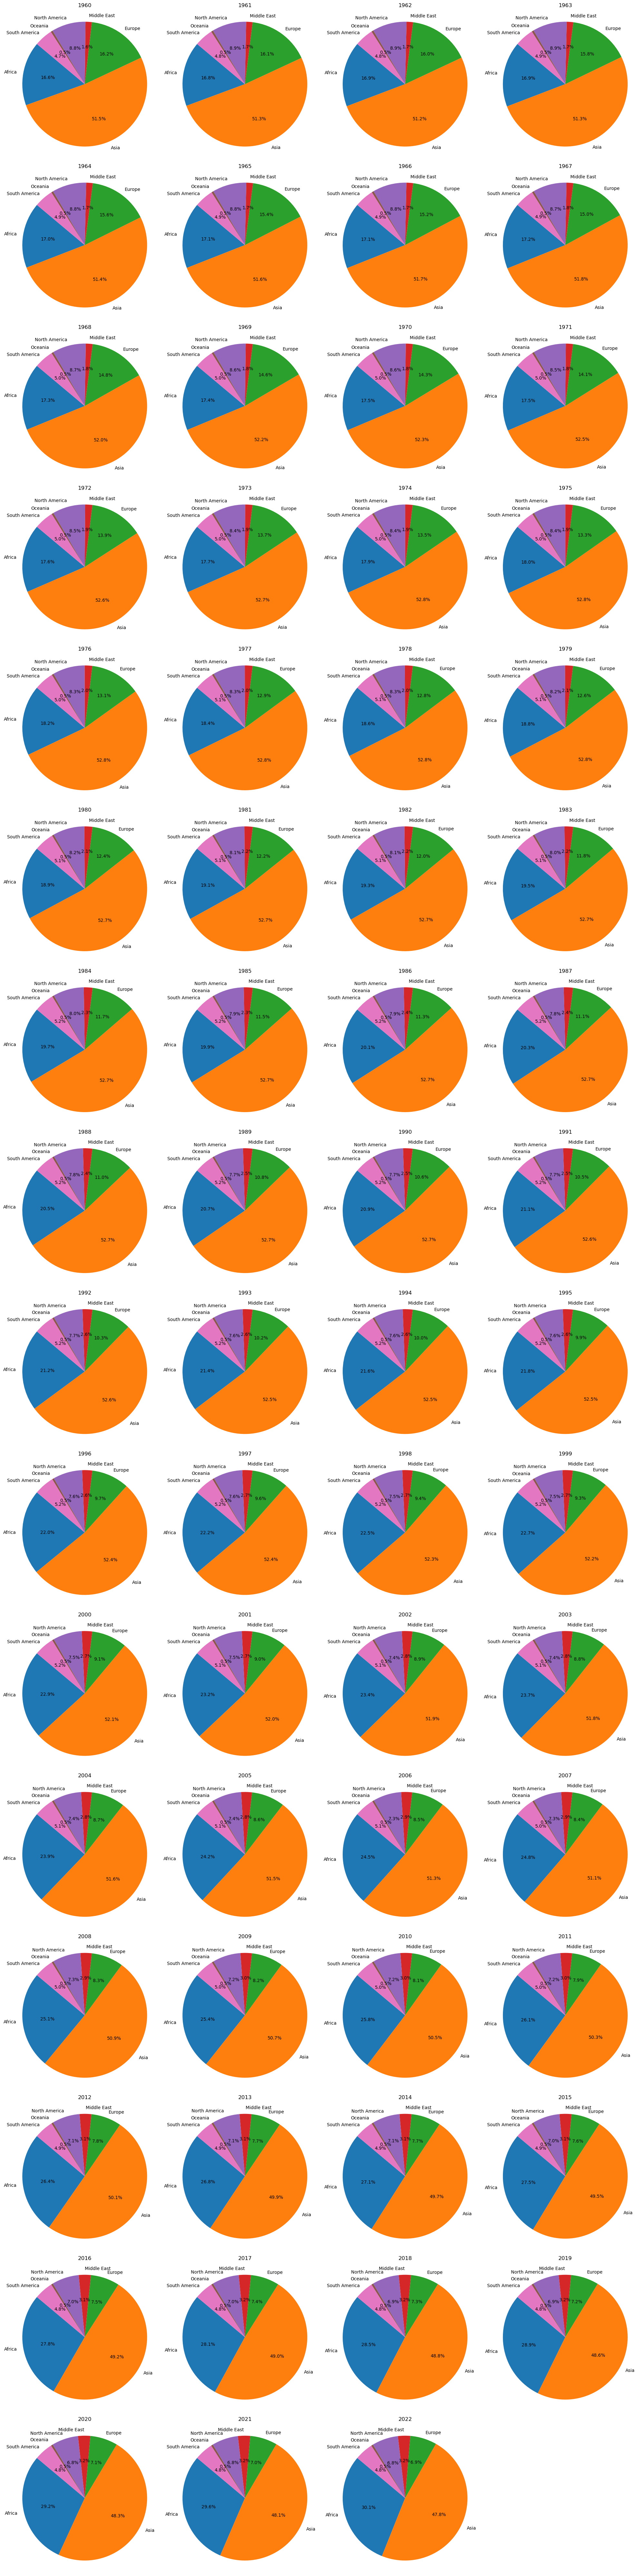

In [36]:
# Population distribution of each year
def plot_pie_charts_side_by_side(df, region_mapping):
    df['Region'] = df['Country Name'].map(region_mapping)

    years = range(1960, 2023)

    num_years = len(years)
    num_cols = 4
    num_rows = int(np.ceil(num_years / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

    axes = axes.flatten()
    
    for i, year in enumerate(years):
        year_str = str(year)
        df_year = df[['Region', year_str]].dropna()
        region_population = df_year.groupby('Region')[year_str].sum()
        axes[i].pie(region_population, labels=region_population.index, autopct='%1.1f%%', startangle=140)
        axes[i].set_title(f'{year_str}')
        axes[i].axis('equal')  

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
 
    plt.tight_layout()
    plt.show()
    
plot_pie_charts_side_by_side(df, region_mapping)


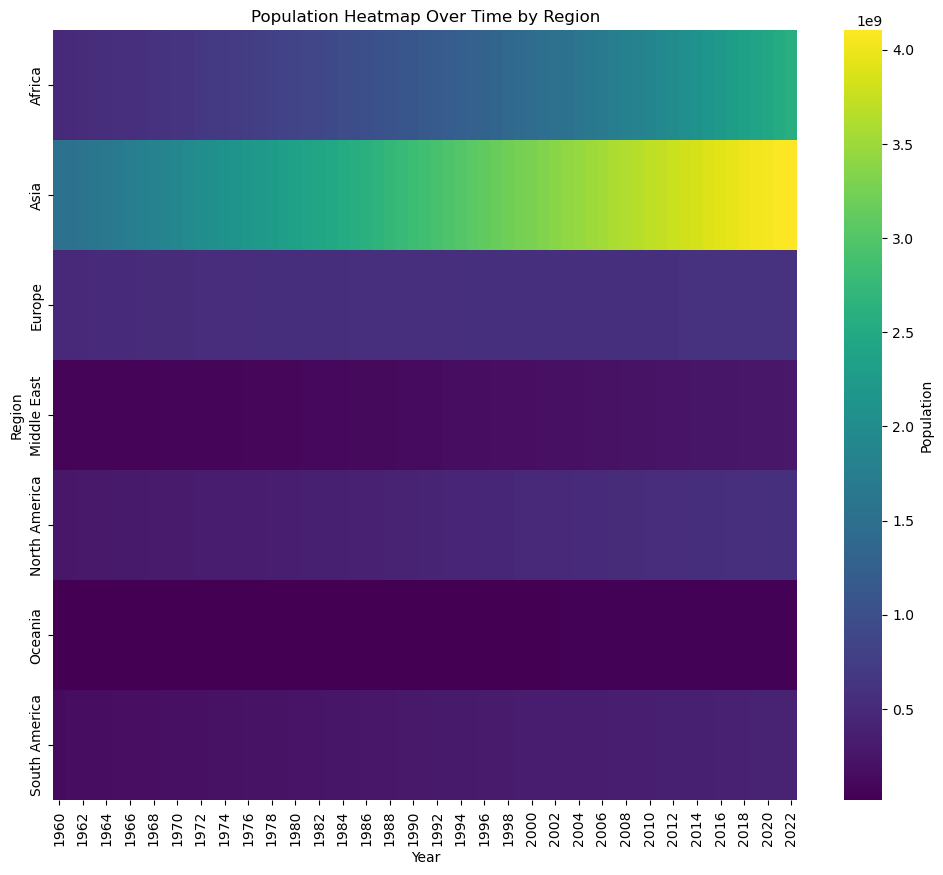

In [37]:
# Population Heatmap Over Time by Region
def plot_population_heatmap(df, region_mapping):
    df['Region'] = df['Country Name'].map(region_mapping)

    df_melted = df.melt(id_vars=['Country Name', 'Region'], 
                        value_vars=[str(year) for year in range(1960, 2023)], 
                        var_name='Year', value_name='Population')

    df_pivot = df_melted.pivot_table(index='Region', columns='Year', values='Population', aggfunc='sum')

    plt.figure(figsize=(12, 10))
    sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Population'})
    plt.title('Population Heatmap Over Time by Region')
    plt.xlabel('Year')
    plt.ylabel('Region')
    plt.show()

plot_population_heatmap(df, region_mapping)

In [38]:
# Choropleth Map of Population
year = '2022'
df_choropleth = df[['Country Name', 'Country Code', year]]
df_choropleth.columns = ['Country', 'ISO3', 'Population']

fig = px.choropleth(df_choropleth, 
                    locations='ISO3',
                    color='Population',
                    hover_name='Country',
                    color_continuous_scale='Viridis',
                    title=f'Choropleth Map of Population in {year}')

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    title={
        'text': f'Choropleth Map of Population in {year}',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

# 4.Summary

In [39]:
def generate_report(df, region_mapping):
  
    df['Region'] = df['Country Name'].map(region_mapping)

    yearly_means = df.loc[:, '1960':'2022'].mean()
    yearly_means_df = yearly_means.reset_index()
    yearly_means_df.columns = ['Year', 'Mean Population']

    mean_population = df.loc[:, '1960':'2022'].mean(axis=1)
    highest_avg_country = df.loc[mean_population.idxmax(), 'Country Name']
    lowest_avg_country = df.loc[mean_population.idxmin(), 'Country Name']

    continents = df['Region'].unique()
    continent_high_low = {}
    for continent in continents:
        continent_df = df[df['Region'] == continent].set_index('Country Name')
        if continent_df.empty:
            continue
        mean_population_continent = continent_df.loc[:, '1960':'2022'].mean(axis=1)
        if not mean_population_continent.empty:
            highest_country_continent = mean_population_continent.idxmax()
            lowest_country_continent = mean_population_continent.idxmin()
            continent_high_low[continent] = {
                'Highest Population': highest_country_continent,
                'Lowest Population': lowest_country_continent
            }

    key_insights = {
        'Highest Average Population': highest_avg_country,
        'Lowest Average Population': lowest_avg_country,
        'Overall Population Trend': 'Steady increase from 1960 to 2022',
        'Challenges': 'Population aging in Europe and North America, requiring policy adjustments',
        'Opportunities': 'Investment in education and healthcare in developing regions',
        'Continent High/Low': continent_high_low
    }

    print("Executive Summary:\n")
    print("Key Findings:")
    print(f"- Country with Highest Average Population: {highest_avg_country}")
    print(f"- Country with Lowest Average Population: {lowest_avg_country}")
    print(f"- Overall Population Trend: Steady increase from 1960 to 2022")
    for continent, high_low in continent_high_low.items():
        print(f"- {continent}:")
        print(f"    - Highest Population: {high_low['Highest Population']}")
        print(f"    - Lowest Population: {high_low['Lowest Population']}")

    return key_insights

report_insights = generate_report(df, region_mapping)


Executive Summary:

Key Findings:
- Country with Highest Average Population: World
- Country with Lowest Average Population: Tuvalu
- Overall Population Trend: Steady increase from 1960 to 2022
- Africa:
    - Highest Population: Africa Eastern and Southern
    - Lowest Population: Seychelles
- Asia:
    - Highest Population: China
    - Lowest Population: Maldives
- Europe:
    - Highest Population: Germany
    - Lowest Population: San Marino
- Middle East:
    - Highest Population: Iran, Islamic Rep.
    - Lowest Population: Bahrain
- South America:
    - Highest Population: Brazil
    - Lowest Population: Suriname
- Oceania:
    - Highest Population: Australia
    - Lowest Population: Vanuatu
- North America:
    - Highest Population: United States
    - Lowest Population: Dominica
